# k-means and fuzzy-c-means clustering

## K-Means clustering
In the previous section, an index for a cluster was obtained. Now, we aim to find indices for multiple clusters. We will proceed similarly, but from a multi-cluster perspective. Initially, we begin with:

$$
\arg \min_\mu(\sum_{j=1}^{C}\sum_{i\in C_j}^{}(\left\| x_i-\mu_j \right\|)^2)
$$

In the above equation, the goal is to minimize the loss for all data points within each cluster (e.g., the jth cluster). Therefore, we aim to minimize dispersion within each cluster by identifying the best index for each cluster ( $ \mu_j $). From this perspective, we prioritize the homogeneity of properties to identify homogeneous clusters. Of course, heterogeneity is another characteristic used alongside homogeneity for clustering purposes. In fuzzy c-means, only the homogeneity property is utilized. 

A significant issue exists in the above equation. How can we calculate:

$$
 \sum_{i\in C_j}^{}(\left\| x_i-\mu_j \right\|)^2 
$$ 

when we don't know which cluster each $ x_i $ belongs to?
K-means solves this problem by initially assuming the cluster centers $ \mu_j $. It then assigns data points to the nearest cluster and updates the centers using:

$$
\mu=\frac{\sum_{}{x{i}}}{n}
$$

This update rule minimizes the Mean Squared Error (MSE).

## K-means Clustering Algorithm

K-means solves the clustering problem by initially assuming the cluster centers $ \mu_j $. It then assigns data points to the nearest cluster and updates the centers using:

$$
\mu_j = \frac{\sum_{i \in C_j} x_i}{|C_j|} 
$$

This update rule minimizes the Mean Squared Error (MSE) within each cluster. The k-means algorithm iterates through the following steps until convergence:

1. **Initialization**: Select $ k $ initial cluster centers (either randomly or using a heuristic).

2. **Assignment**: Assign each data point to the nearest cluster center.

3. **Update**: Recalculate the cluster centers as the mean of the data points assigned to each cluster using $ \mu_j = \frac{\sum_{i \in C_j} x_i}{|C_j|} $.

4. **Repeat**: Repeat the assignment and update steps until the cluster centers no longer change significantly.

### K-means Algorithm Implementation in Python

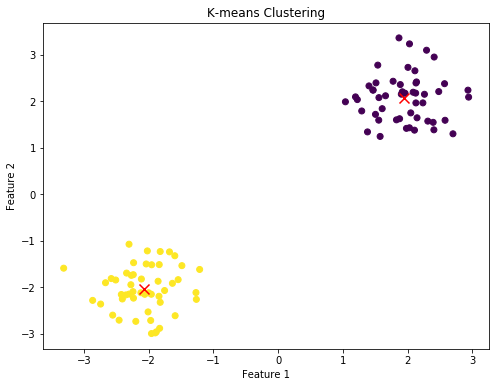

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=(-2, -2), scale=0.5, size=(50, 2)),
    np.random.normal(loc=(2, 2), scale=0.5, size=(50, 2))])

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Explanation of the Code:

1. **Data Generation**: We generate a synthetic 2D dataset consisting of two clusters centered at `(-2, -2)` and `(2, 2)`.

2. **K-means Clustering**: We apply k-means clustering to the dataset using the `KMeans` class from `sklearn.cluster`. We specify `n_clusters=2` to create two clusters and set a random seed for reproducibility.

3. **Labels and Centroids**: After fitting the model to the data, we obtain the cluster labels for each data point and the coordinates of the cluster centroids.

4. **Visualization**: We plot the data points, colored by their cluster assignments, and mark the cluster centroids with red 'x' symbols.

## Homework

1. Experiment with different datasets (normal, noisy, shot noise, various densities, etc.).
2. Change the loss function and compare with square loss across various datasets.
3. Tune parameters such as the number of clusters and hyperparameters in correntropy and other loss functions.
4. Provide suitable results along with explanations and discussion.

## Fuzzy-c-means clustering
Fuzzy C-Means (FCM) clustering, developed by J.C. Bezdek in 1981, is an unsupervised clustering algorithm that allows one piece of data to belong to two or more clusters. 

![James Bezdek](ClusteringImages/jim-bezdek-2.jpg)

J. C. Bezdek, R. Ehrlich, and W. Full, “FCM: The fuzzy c-means clustering algorithm,” Comput. Geosci., vol. 10, no. 2–3, pp. 191–203, 1984.

Mr. James Bozdek had an extraordinary idea that transformed the following relation from NP-Hard. The following relation is unsolvable due to the lack of knowledge about the samples present in a cluster, meaning that without knowing which cluster the data belongs to, clustering is not possible.

$$
\arg \min_\mu(\sum_{j=1}^{C}\sum_{i\in C_j}^{}(\left\| x_i-\mu_j \right\|)^2)
$$

Mr. Bozdek's significant work is illustrated in the next relation. In this relation, to calculate the homogeneity of each cluster, all data is used, making the problem solvable.

$$
J_m (U,\mu)=(\sum_{j=1}^{C}\sum_{i=1}^{n}(u_{ij}^{m}\left\|x_i-\mu_j \right\|)^2)
$$

subject to

$$
u_{ij} \in [0, 1], \quad \sum_{j=1}^{C} u_{ij} = 1 \quad \forall i
$$

where:
- $ n $ is the number of data points.
- $ C $ is the number of clusters.
- $ u_{ij} $ is the degree of membership of $ x_i $ in the cluster j .
- $ m $ is the fuzziness index (also called the weighting exponent), $ m > 1 $.
- $ x_i $ is the $ i $-th data point.
- $ \mu_j $ is the center of the $ j $-th cluster.
- $ \| x_i - c_j \| $ is the Euclidean distance between $ x_i $ and $ \mu_j $.

### Steps of the Algorithm

1. **Initialize the membership matrix**  U :

   $$
   U = [u_{ij}], \quad u_{ij} \in [0, 1], \quad \sum_{j=1}^{C} u_{ij} = 1 \quad \forall i
   $$

2. **Update cluster centers** $ \mu_j $:

   $$
   \mu_j = \frac{\sum_{i=1}^{N} u_{ij}^m x_i}{\sum_{i=1}^{N} u_{ij}^m} 
   $$

3. **Update membership values** $ u_{ij} $:

   $$
   u_{ij} = \frac{1}{\sum_{k=1}^{C} \left( \frac{\| x_i - c_j \|}{\| x_i - c_k \|} \right)^{\frac{2}{m-1}}} 
   $$

4. **Check for convergence**:
   - Calculate the change in the membership matrix or the cluster centers.
   - If the change is less than a predefined threshold, stop; otherwise, go back to step 2.

### Detailed Explanation of Equations

1. **Objective Function**:
   - $ J_m $ is minimized when the clusters are as compact as possible and the data points are as close to the cluster centers as possible.

2. **Cluster Centers**:
   - $ \mu_j $ is updated as a weighted mean of all data points, where the weights are the membership values raised to the power $ m $ . This equation ensures that points with higher membership values have a greater influence on the cluster center.

3. **Membership Values**:
   - $ u_{ij} $ is updated based on the relative distance of $ x_i $ from each cluster center. The membership value is inversely related to the distance to the cluster centers: the closer a data point is to a cluster center, the higher its membership value in that cluster.

### Algorithm Convergence

The algorithm iterates between updating the cluster centers and membership values until

$$
|J_m-J_(m-1)| \le \epsilon
$$
 
### Practical Considerations

- **Initialization**: The initial membership matrix $ U $ can be set randomly, but the choice can affect the convergence speed and the quality of the final clustering.
- **Fuzziness Index m**: Commonly,  m  is set to 2, but it can be tuned based on the dataset and the desired level of cluster fuzziness.
- **Distance Metric**: While _square loss_ is commonly used, other loss function can be employed based on the nature of the data.

## Step-by-Step FCM Solution with Lagrangian

1. **Objective Function**:

   $$
   J_m = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ij}^m \| x_i - \mu_j \|^2 
   $$

2. **Constraint**:
   
   $$
   \sum_{j=1}^{C} u_{ij} = 1, \quad \forall i 
   $$

3. **Lagrangian Formulation**:

   To incorporate the constraint, we introduce Lagrange multipliers \( \lambda_i \):

   $$
   L = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ij}^m \| x_i - \mu_j \|^2 + \sum_{i=1}^{N} \lambda_i \left( \sum_{j=1}^{C} u_{ij} - 1 \right) 
   $$

4. **Partial Derivatives with Respect to** $ u_{ij} $ :

   To find the optimal membership values, we take the partial derivative of  L  with respect to $ u_{ij} $ and set it to zero:


   $$ 
    \frac{\partial L}{\partial u_{ij}} = m u_{ij}^{m-1} \| x_i - \mu_j \|^2 + \lambda_i = 0
   $$

   Solving for $ u_{ij} $:

   $$
   u_{ij}^{m-1} \| x_i - \mu_j \|^2 = -\frac{\lambda_i}{m} 
   $$

   To satisfy the constraint \( \sum_{j=1}^{C} u_{ij} = 1 \), we solve for \( \lambda_i \):

   $$
   \sum_{j=1}^{C} u_{ij} = 1 
   $$

   $$
   \sum_{j=1}^{C} \left( \frac{1}{\| x_i - \mu_j \|^2} \right)^{\frac{1}{m-1}} = \frac{-m}{\lambda_i} 
   $$

   Thus:

   $$
    \lambda_i = -m \left( \sum_{j=1}^{C} \left( \frac{1}{\| x_i - \mu_j \|^2} \right)^{\frac{1}{m-1}} \right)^{-1} 
   $$

  Substituting back:

$$
u_{ij} = \frac{\left( \frac{1}{\| x_i - \mu_j \|^2} \right)^{\frac{1}{m-1}}}{\sum_{k=1}^{C} \left( \frac{1}{\| x_i - \mu_k \|^2} \right)^{\frac{1}{m-1}}} 
$$

5. **Partial Derivatives with Respect to** $ \mu_j $ :

   To find the optimal cluster centers, we take the partial derivative of $ J_m $ with respect to $ \mu_j $ and set it to zero:

   $$
   \frac{\partial J_m}{\partial \mu_j} = \sum_{i=1}^{N} u_{ij}^m 2 (\mu_j - x_i) = 0 
   $$

   Solving for $ \mu_j $ :

   $$
   \sum_{i=1}^{N} u_{ij}^m \mu_j = \sum_{i=1}^{N} u_{ij}^m x_i 
   $$

   $$
   \mu_j \sum_{i=1}^{N} u_{ij}^m = \sum_{i=1}^{N} u_{ij}^m x_i 
   $$

   $$
   \mu_j = \frac{\sum_{i=1}^{N} u_{ij}^m x_i}{\sum_{i=1}^{N} u_{ij}^m} 
   $$


### Algorithm Steps

1. **Initialize the membership matrix** $ U $ with random values such that

$$
\sum_{j=1}^{C} u_{ij} = 1 
$$

2. **Update cluster centers** $ \mu_j $:

   $$
   \mu_j = \frac{\sum_{i=1}^{N} u_{ij}^m x_i}{\sum_{i=1}^{N} u_{ij}^m} 
   $$

3. **Update membership values** $ u_{ij} $:
   
   $$
    u_{ij} = \frac{\left( \frac{1}{\| x_i - \mu_j \|^2} \right)^{\frac{1}{m-1}}}{\sum{_k=1}^{C} \left( \frac{1}{\| x_i - \mu_k \|^2} \right)^{\frac{1}{m-1}}} 
    $$

4. **Check for convergence**:
   The algorithm iterates between updating the cluster centers and membership values until
   
   $$
   |J_m-J_(m-1)| \le \epsilon
   $$

## Hint: Doing It

- See the fuzzy toolbox: [Fuzzy Toolbox](https://pythonhosted.org/scikit-fuzzy/userguide/getting_started.html#finding-your-way-around).
  
- For image segmentation using FCM, see [FCM Segmentation](https://github.com/FarheenB/FCM-Satellite-Images-in-Python).

## Some of my papers about **Clustering**:
Certainly! Here are the corrected references:

1. A. Gharib, H. Sadoghi-Yazdi, A. Hossein Taherinia, "Robust Heterogeneous C-means," *Applied Soft Computing*, vol. 86, p. 105885.

2. H. Hossein-Abad Mahdipour, M. Khademi, H. Yazdi Sadoghi, "Model-based fuzzy c-shells clustering," *Neural Computing and Applications*, vol. 21, pp. 29-41.

3. H. Sadoghi Yazdi, J. A. Nasiri, "Fuzzy Image Segmentation Using Human Interaction," *Journal of Applied Sciences Research*, vol. 5.

4. M. H. A. Hadi, K. Morteza, S. Y. Hadi, "Least mean square algorithm tuned by fuzzy C-means for impulsive noise suppression of gray-level images," *International Journal of Signal Processing, Image Processing and Pattern Recognition*.

5. M. Hadi, K. Morteza, S. Y. Hadi, "Vector fuzzy C-means," *Journal of Intelligent & Fuzzy Systems*, vol. 24, no. 2, pp. 363-381.

6. M. Moradi, M. Salehi, H. S. Yazdi, M. E. Gorgani, "Going concern prediction of Iranian companies by using fuzzy c-means," *Open Journal of Accounting*, vol. 1, no. 02, p. 38.

7. S. Effati, H. S. Yazdi, A. J. Sharahi, "Fuzzy clustering algorithm for fuzzy data based on α-cuts," *Journal of Intelligent & Fuzzy Systems*, vol. 24, no. 3, pp. 511-519.

8. H. S. Yazdi, M. GhasemiGol, S. Effati, A. Jiriani, R. Monsefi, "Hierarchical tree clustering of fuzzy number," *Journal of Intelligent & Fuzzy Systems*, vol. 26, no. 2, pp. 541-550.

9. M. GhasemiGol, H. S. Yazdi, R. Monsefi, "A new hierarchical clustering algorithm on fuzzy data (FHCA)," *International Journal of Computer and Electrical Engineering*, vol. 2, no. 1, pp. 1793-8163.

10. M. M. Salkhordeh Haghighi, H. Sadoghi Yazdi, A. Vahedian Mazloum, "A hierarchical possibilistic clustering," *International Journal of Computer Theory and Engineering*, vol. 1.

11. S. A. Toussi, H. S. Yazdi, E. Hajinezhad, S. Effati, "Eigenvector selection in spectral clustering using Tabu search," in *2011 1st International eConference on Computer and Knowledge Engineering*.

12. S. M. Hosseini, H. Farsi, H. S. Yazdi, "Best clustering around the color images," *International Journal of Computer and Electrical Engineering*, vol. 1, no. 1, p. 20.

13. M. Zamiri, H. S. Yazdi, "Image annotation based on multi-view robust spectral clustering," *Journal of Visual Communication and Image Representation*, vol. 74, p. 103003.

14. M. Zamiri, T. Bahraini, H. S. Yazdi, "MVDF-RSC: Multi-view data fusion via robust spectral clustering for geo-tagged image tagging," *Expert Systems with Applications*, vol. 173, p. 114657.

15. J. Hamidzadeh, R. Monsefi, H. S. Yazdi, "IRAHC: instance reduction algorithm using hyperrectangle clustering," *Pattern Recognition*, vol. 48, no. 5, pp. 1878-1889.